# Introduction to Regression with ```statsmodels``` in Python

## Chapter 2: Predictions and model objects

In [1]:
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
taiwan_real_estate = pd.read_csv("taiwan_real_estate2.csv")
taiwan_real_estate

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847
...,...,...,...,...
409,4082.01500,0,0 to 15,4.659607
410,90.45606,9,0 to 15,15.128593
411,390.96960,7,15 to 30,12.284418
412,104.81010,5,0 to 15,15.885023


In [3]:
# Create the explanatory_data
explanatory_data = pd.DataFrame({'n_convenience': np.arange(11)})

# Print it
print(explanatory_data)

    n_convenience
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10


In [4]:
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate)
mdl_price_vs_conv = mdl_price_vs_conv.fit()
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [5]:
# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Print it
print(price_twd_msq)

0      8.224237
1      9.022317
2      9.820397
3     10.618477
4     11.416556
5     12.214636
6     13.012716
7     13.810795
8     14.608875
9     15.406955
10    16.205035
dtype: float64


In [6]:
# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = price_twd_msq)

# Print the result
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


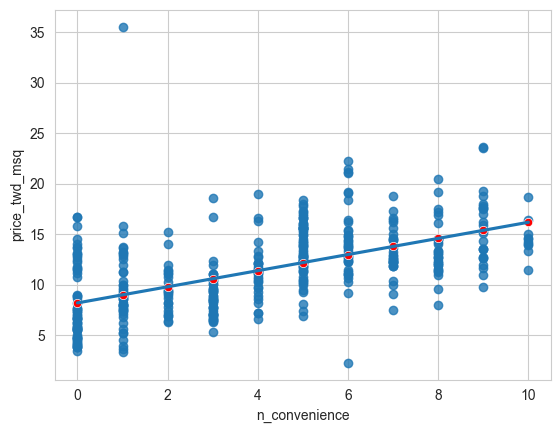

In [9]:
# Create a new figure, fig
fig = plt.figure()

sns.regplot(
    x="n_convenience",
    y="price_twd_msq",
    data=taiwan_real_estate,
    ci=None
)

sns.scatterplot(
    x="n_convenience",
    y="price_twd_msq",
    data=prediction_data,
    color="red"
)
# Show the layered plot
plt.show()

In [10]:
# Define a DataFrame impossible
impossible = pd.DataFrame({"n_convenience": [-1, 2.5]})

mdl_price_vs_conv.predict(impossible)

0     7.426158
1    10.219437
dtype: float64

In [11]:
# Print the model parameters of mdl_price_vs_conv
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [12]:
# Print the fitted values of mdl_price_vs_conv
print(mdl_price_vs_conv.fittedvalues)

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64


In [13]:
# Print the residuals of mdl_price_vs_conv
print(mdl_price_vs_conv.resid)

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64


In [14]:
# Print a summary of mdl_price_vs_conv
print(mdl_price_vs_conv.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           3.41e-37
Time:                        01:34:43   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857

In [15]:
# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

# Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]

# Manually calculate the predictions
price_twd_msq = slope * explanatory_data + intercept
print(price_twd_msq)

# Compare to the results from .predict()
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035
    n_convenience  predictions_auto
0        8.224237          8.224237
1        9.022317          9.022317
2        9.820397          9.820397
3       10.618477         10.618477
4       11.416556         11.416556
5       12.214636         12.214636
6       13.012716         13.012716
7       13.810795         13.810795
8       14.608875         14.608875
9       15.406955         15.406955
10      16.205035         16.205035


In [16]:
sp500_yearly_returns = pd.read_csv("sp500_yearly_returns.csv")
sp500_yearly_returns

,symbol,return_2018,return_2019
0,AAPL,-0.053902,0.889578
1,MSFT,0.207953,0.575581
2,AMZN,0.284317,0.230278
3,FB,-0.257112,0.565718
4,GOOGL,-0.008012,0.281762
...,...,...,...
488,HFC,0.019944,0.019407
489,FTI,-0.363155,0.120931
490,UAA,0.224532,0.222411
491,UA,0.213964,0.186147


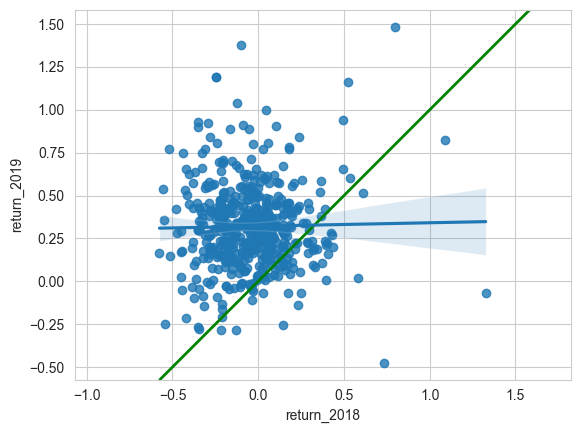

In [17]:
# Create a new figure, fig
fig = plt.figure()

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x="return_2018", y="return_2019", data=sp500_yearly_returns)

# Set the axes so that the distances along the x and y axes look the same
plt.axis("equal")

# Show the plot
plt.show()

In [18]:
# Run a linear regression on return_2019 vs. return_2018 using sp500_yearly_returns
mdl_returns = ols("return_2019 ~ return_2018", data=sp500_yearly_returns).fit()

# Print the parameters
print(mdl_returns.params)

Intercept      0.321321
return_2018    0.020069
dtype: float64


In [19]:
mdl_returns = ols("return_2019 ~ return_2018", data=sp500_yearly_returns).fit()

# Create a DataFrame with return_2018 at -1, 0, and 1
explanatory_data = pd.DataFrame({'return_2018': [-1, 0, 1]})

# Use mdl_returns to predict with explanatory_data
print(mdl_returns.predict(explanatory_data))

0    0.301251
1    0.321321
2    0.341390
dtype: float64


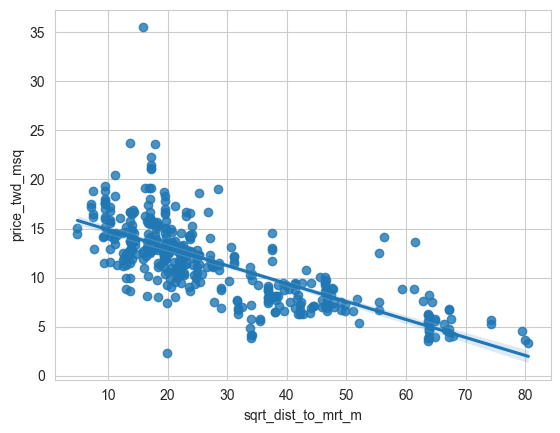

In [20]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

plt.figure()

# Plot using the transformed variable
sns.regplot(
    y="price_twd_msq",
    x="sqrt_dist_to_mrt_m",
    data=taiwan_real_estate)
plt.show()

In [21]:
# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Print the parameters
print(mdl_price_vs_dist.params)

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64


In [22]:
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                 "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

# Print the result
print(prediction_data)

   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


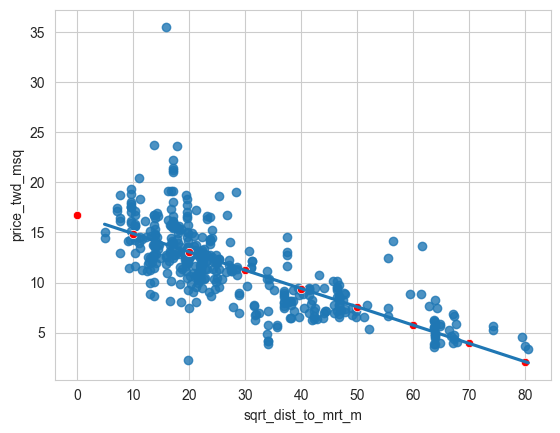

In [23]:
fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=prediction_data, color="red")
plt.show()

In [24]:
ad_conversion = pd.read_csv("ad_conversion.csv")
ad_conversion

,spent_usd,n_impressions,n_clicks
0,1.430000,7350,1
1,1.820000,17861,2
2,1.250000,4259,1
3,1.290000,4133,1
4,4.770000,15615,3
...,...,...,...
931,358.189997,1129773,252
932,173.880003,637549,120
933,40.289999,151531,28
934,198.710001,790253,135


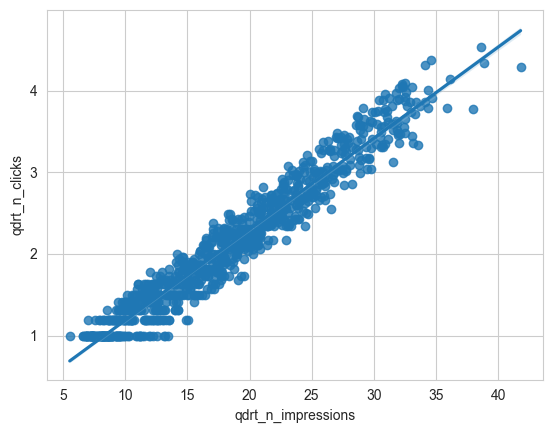

In [27]:
# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

plt.figure()

# Plot using the transformed variables
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion)
plt.show()

In [29]:
mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion).fit()

explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

In [30]:
# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

# Print the result
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


In [31]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks    n_clicks
0            0.000000            0.0       0.071748    0.000026
1           26.591479       500000.0       3.037576   85.135121
2           31.622777      1000000.0       3.598732  167.725102
3           34.996355      1500000.0       3.974998  249.659131
4           37.606031      2000000.0       4.266063  331.214159
5           39.763536      2500000.0       4.506696  412.508546
6           41.617915      3000000.0       4.713520  493.607180


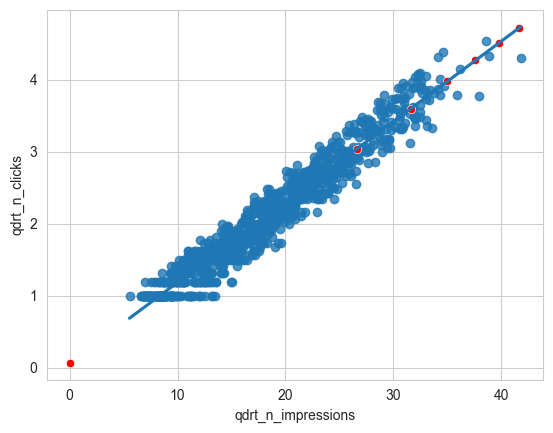

In [32]:
# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=prediction_data, color="red")
plt.show()